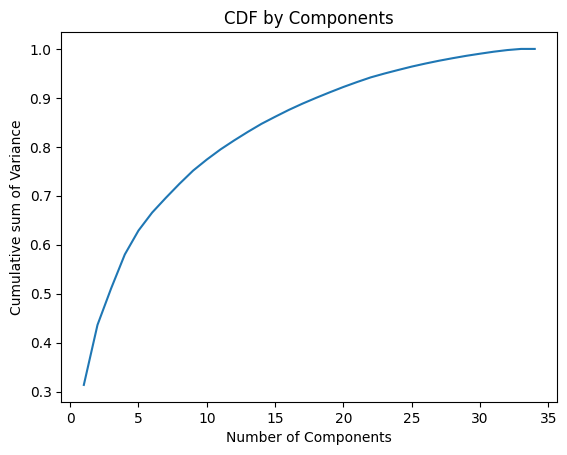

the 95% value of element is 23


In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

df = pd.read_csv(r'/content/ionosphere.csv')
dfm = df.iloc[:, :-1].values
pca = PCA().fit(dfm)
x= pca.explained_variance_ratio_
plt.plot(range(1, 35),x.cumsum() )
plt.title('CDF by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative sum of Variance')
plt.show()

#for finding 95%
val=  sum(x.cumsum() < 0.95)
print("the 95% value of element is", val)

In [2]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
# using the train test split function

df.columns=['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X13','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23','X24','X25',
             'X26','X27','X28','X29','X30','X31','X32','X33','X34', 'label']
data = df[df.columns[~df.columns.isin(['X24','X25',
             'X26','X27','X28','X29','X30','X31','X32','X33','X34'])]] #drop 24 to 34 columns
# train_data = data.sample(frac = 0.7)
# train = df.drop(train_data.index)
df_y= data.iloc[:,-1:] #keep only last column
dfx= data.iloc[:, :-1].values #keep all columns except last column
df_y.columns=['label']
X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(dfx , df_y,
                                   random_state=50,
                                   test_size=0.3,
                                   shuffle=True) #70:30 ratio

label
g        224
b        126
dtype: int64


<Axes: ylabel='Type'>

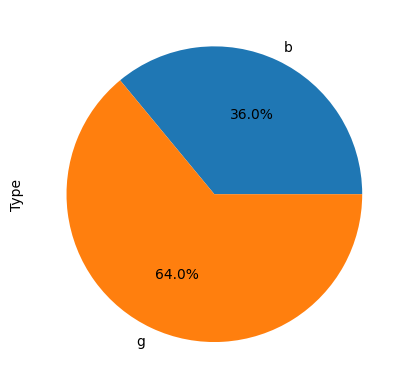

In [3]:
print(df_y.value_counts())

df_y.groupby('label').size().plot(kind='pie',
                                       y = "label",
                                       label = "Type",
                                       autopct='%1.1f%%')

In [4]:
#data unbalanced and need to upsampling data
label_g = data[data["label"] == "g"]
label_b  = data[data["label"] == "b"]
print(label_g.shape)
print(label_b.shape)

(224, 26)
(126, 26)


In [5]:
from sklearn.utils import resample

#data is unbalanaced need to upsampling data
b_upsample = resample(label_b,
             replace=True,
             n_samples=len(label_g),
             random_state=42)

print(b_upsample.shape)

(224, 26)


<Axes: ylabel='Type'>

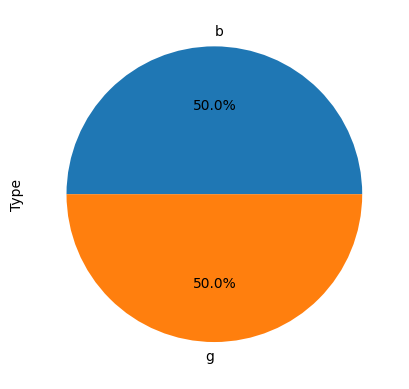

In [6]:
data_upsampled = pd.concat([label_g, b_upsample])
# print(data_upsampled.value_counts())

data_upsampled.groupby('label').size().plot(kind='pie',
                                       y = "label",
                                       label = "Type",
                                       autopct='%1.1f%%')

In [7]:
#split new balanced data set



df_y_balanced= data_upsampled.iloc[:,-1:] #only last column
dfx_balanced= data_upsampled.iloc[:, :-1].values #all columns except last column

X_train, X_test, y_train, y_test = train_test_split(dfx_balanced , df_y_balanced,
                                   random_state=50,
                                   test_size=0.3,
                                   shuffle=True) #70:30 ratios


In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

knn= KNeighborsClassifier(n_neighbors=3)
# Create the parameter grid
n_neighbors = [2,4,5,6,7,8,10]

param_grid = {'n_neighbors': n_neighbors}

# Create a base model
knn = KNeighborsClassifier(n_neighbors=5)

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
knn_model = GridSearchCV(estimator=knn,
                           param_grid=param_grid,
                           scoring='accuracy',

                           verbose=1)
knn_model.fit(dfx_balanced, df_y_balanced)


Fitting 5 folds for each of 7 candidates, totalling 35 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 4, 5, 6, 7, 8, 10]},
             scoring='accuracy', verbose=1)

In [9]:
#best value for K mean clustering
print("The best hyperparameters from Grid Search are:")
print(knn_model.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(knn_model.best_score_)

The best hyperparameters from Grid Search are:
{'n_neighbors': 2}

The mean accuracy of a model with these hyperparameters is:
0.9486392009987515


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Figure size 2080x600 with 0 Axes>

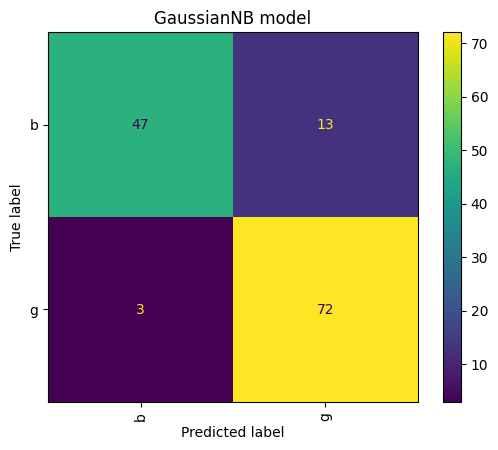

              precision    recall  f1-score   support

           b       0.94      0.78      0.85        60
           g       0.85      0.96      0.90        75

    accuracy                           0.88       135
   macro avg       0.89      0.87      0.88       135
weighted avg       0.89      0.88      0.88       135



In [10]:

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(X_train, y_train)
label= model.predict((X_test))[0]
label_prep= model.predict((X_test))
from sklearn import metrics

axis= [ 'b','g']
plt.figure(figsize=(20.8,6))
confusion_matrix = metrics.confusion_matrix(y_test,label_prep)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels =axis)

cm_display.plot(xticks_rotation= 'vertical')
plt.title("GaussianNB model")
plt.show()

# # Print confusion matrix
# CF = confusion_matrix(y_test, label_prep)
# print("Confusion Matrix Test Set")
# print(CF)
# print("\n")

# Print classification report
CP = classification_report(y_test, label_prep)
print(CP)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

<Figure size 2080x600 with 0 Axes>

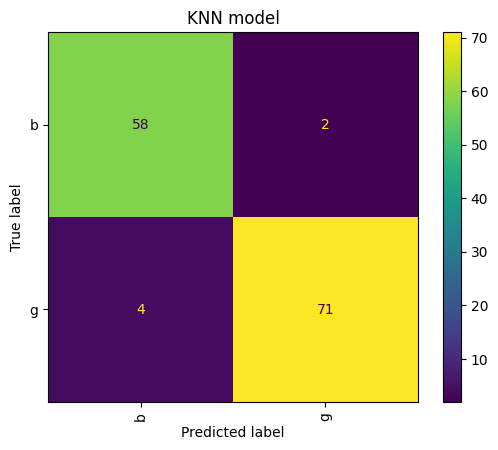

              precision    recall  f1-score   support

           b       0.94      0.97      0.95        60
           g       0.97      0.95      0.96        75

    accuracy                           0.96       135
   macro avg       0.95      0.96      0.96       135
weighted avg       0.96      0.96      0.96       135



In [11]:
# knn Model training
knn_model.fit(X_train, y_train)
label= knn_model.predict((X_test))[0]
label_prep= knn_model.predict((X_test))
from sklearn import metrics

axis= [ 'b','g']
plt.figure(figsize=(20.8,6))
confusion_matrix = metrics.confusion_matrix(y_test,label_prep)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels =axis)

cm_display.plot(xticks_rotation= 'vertical')
plt.title("KNN model")
plt.show()

# # Print confusion matrix
# CF = confusion_matrix(y_test, label_prep)
# print("Confusion Matrix Test Set")
# print(CF)
# print("\n")

# Print classification report
CP = classification_report(y_test, label_prep)
print(CP)

label
g        76
b        29
dtype: int64


<Axes: ylabel='Type'>

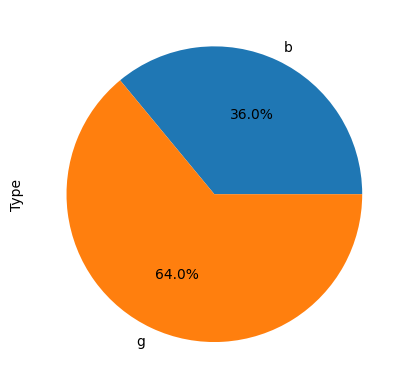

In [12]:
#sample after train test split


from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
# using the train test split function

# df.columns=['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X13','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23','X24','X25',
#              'X26','X27','X28','X29','X30','X31','X32','X33','X34', 'label']
# data = df[df.columns[~df.columns.isin(['X24','X25',
#              'X26','X27','X28','X29','X30','X31','X32','X33','X34'])]] #drop 24 to 34 columns
train_data = data.sample(frac = 0.7)
test_data = data.drop(train_data.index)
X_train= train_data.iloc[:,-1:] #only last column
X_test= train_data.iloc[:, :-1].values #all columns except last column
y_test= test_data.iloc[:,-1:] #only last column
y_train= test_data.iloc[:, :-1].values #all columns except last column
print(y_test.value_counts())

df_y.groupby('label').size().plot(kind='pie',
                                       y = "label",
                                       label = "Type",
                                       autopct='%1.1f%%')

In [13]:
#data unbalanced and need to upsampling train data
label_g = train_data[train_data["label"] == "g"]
label_b  = train_data[train_data["label"] == "b"]
print(label_g.shape)
print(label_b.shape)

(148, 26)
(97, 26)


In [14]:
from sklearn.utils import resample

#data is unbalanaced need to upsampling data
b_upsample = resample(label_b,
             replace=True,
             n_samples=len(label_g),
             random_state=42)

print(b_upsample.shape)

(148, 26)


<Axes: ylabel='Type'>

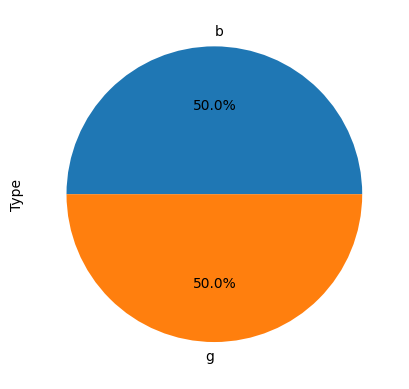

In [15]:
X_train_data_upsampled = pd.concat([label_g, b_upsample])
# print(data_upsampled.value_counts())

X_train_data_upsampled.groupby('label').size().plot(kind='pie',
                                       y = "label",
                                       label = "Type",
                                       autopct='%1.1f%%')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Figure size 2080x600 with 0 Axes>

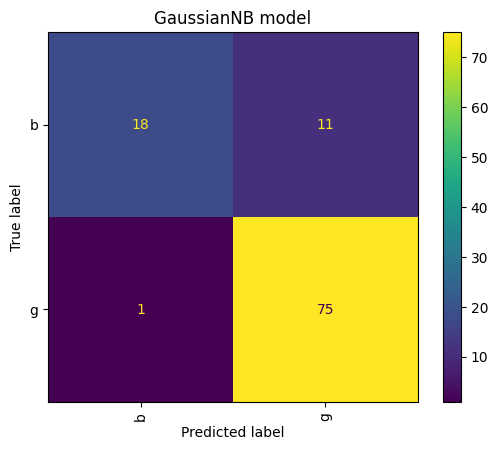

              precision    recall  f1-score   support

           b       0.95      0.62      0.75        29
           g       0.87      0.99      0.93        76

    accuracy                           0.89       105
   macro avg       0.91      0.80      0.84       105
weighted avg       0.89      0.89      0.88       105



In [16]:
X_test_sample= X_train_data_upsampled.iloc[:,-1:] #only last column
X_train_sample= X_train_data_upsampled.iloc[:, :-1].values #all columns except last column
model = GaussianNB()

model.fit(X_train_sample, X_test_sample)
label= model.predict((y_train))[0]
label_prep= model.predict((y_train))
from sklearn import metrics

axis= [ 'b','g']
plt.figure(figsize=(20.8,6))
confusion_matrix = metrics.confusion_matrix(y_test,label_prep)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels =axis)

cm_display.plot(xticks_rotation= 'vertical')
plt.title("GaussianNB model")
plt.show()

# # Print confusion matrix
# CF = confusion_matrix(y_test, label_prep)
# print("Confusion Matrix Test Set")
# print(CF)
# print("\n")

# Print classification report
CP = classification_report(y_test, label_prep)
print(CP)